In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("bread basket.csv")
print("DataFrame shape : ",data.shape)
data.head()

DataFrame shape :  (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
# format data waktu
data['date_time'] = pd.to_datetime(data['date_time'], format= "%d-%m-%Y %H:%M")

In [4]:
data["date_time"].dtype

dtype('<M8[ns]')

In [5]:
data["month"] = data['date_time'].dt.month
data["day"] = data['date_time'].dt.weekday
data["hour"] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


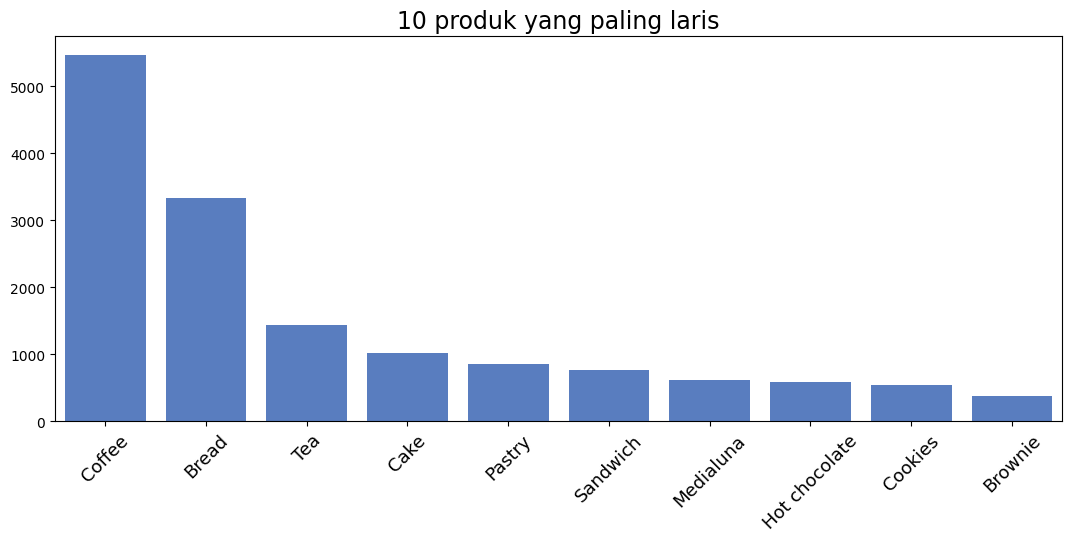

In [6]:
# menampilkan 10 item paling laris

plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index, 
            y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 produk yang paling laris', size = 17)
plt.show()

Text(0.5, 1.0, 'jumlah transaksi tiap bulan dari oktober - april')

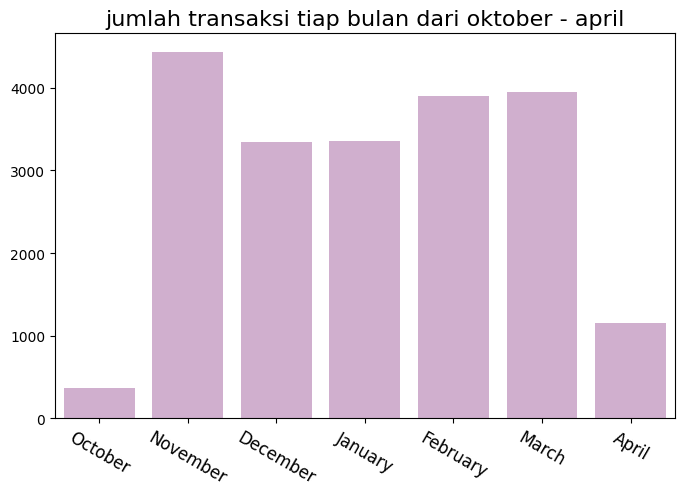

In [7]:
# transaksi tiap bulan

data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["October", "November", "December", "January", "February", "March", "April"],
    y = data_perbulan.values, color= "#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi tiap bulan dari oktober - april", size = 16)

Text(0.5, 1.0, 'Total Transaksi per hari')

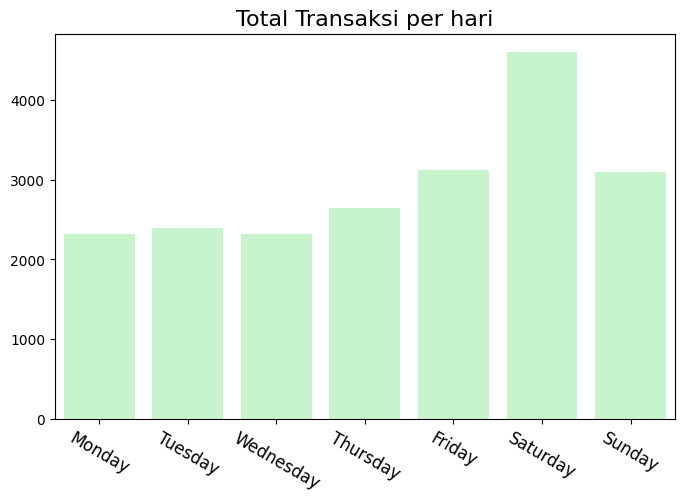

In [8]:
# transaksi perhari

data_perday = data.groupby('day')['Transaction'].count()


plt.figure(figsize= (8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = data_perday.values, color= "#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transaksi per hari", size = 16)

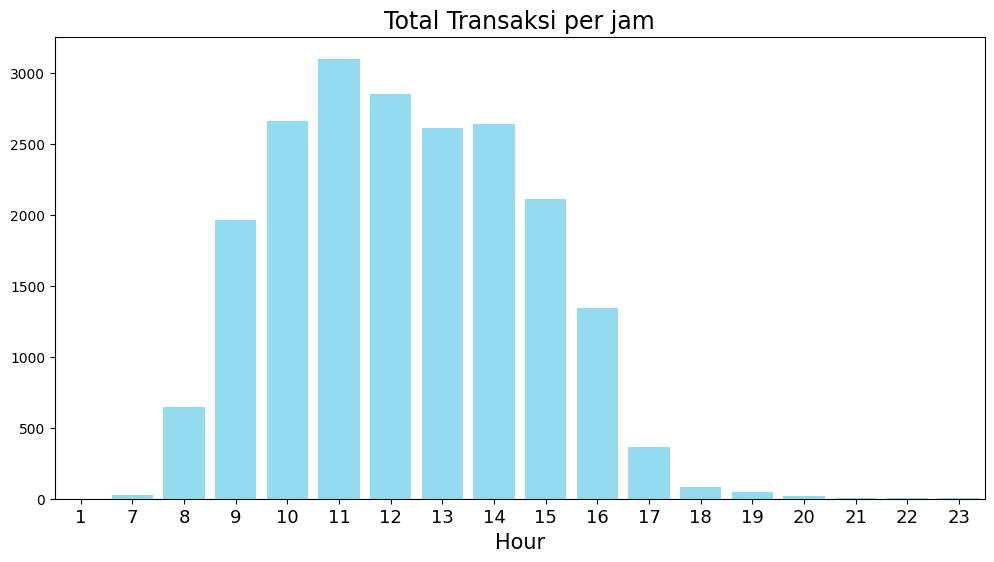

In [9]:
# pembelian tiap jam

data_perhour = data.groupby('hour')['Transaction'].count()


plt.figure(figsize= (12,6))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values, color= "#85E3FF")
plt.xlabel('Hour', size = 15)
plt.xticks(size = 13)
plt.title("Total Transaksi per jam", size = 17)
plt.show()

In [10]:
# data preparation

In [11]:
data["item"] = data["Item"].apply(lambda item: item.lower())

In [12]:
data["item"] = data["Item"].apply(lambda item: item.strip())

In [13]:
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
5,3,Cookies
6,4,Muffin
7,5,Coffee
8,5,Pastry
9,5,Bread


In [14]:
from mlxtend.frequent_patterns import association_rules, apriori

In [15]:
item_count = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
5,4,Muffin,1
6,5,Bread,1
7,5,Coffee,1
8,5,Pastry,1
9,6,Medialuna,1


In [16]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset :", item_count_pivot.shape)
item_count_pivot.head(5)

Ukuran Dataset : (9465, 94)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
def encode(x):
    if x <=0:
        return 0
    elif x >= 1:
        return 1
    
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

C:\Users\62859\AppData\Local\Temp\ipykernel_20388\3661972308.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_count_pivot = item_count_pivot.applymap(encode)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print("Ukuran dataset :", item_count_pivot.shape)
print("Jumlah Transaksi :", item_count_pivot.shape[0])
print("Jumlah items :", item_count_pivot.shape[1])

Ukuran dataset : (9465, 94)
Jumlah Transaksi : 9465
Jumlah items : 94


In [20]:
support = 0.01
frequent_item = apriori(item_count_pivot, min_support= support, use_colnames= True)
frequent_item.sort_values("support", ascending= False).head(10)

c:\Users\62859\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Bread, Coffee)"
19,0.086107,(Pastry)
21,0.071844,(Sandwich)
16,0.061807,(Medialuna)
12,0.058320,(Hot chocolate)
42,0.054728,"(Cake, Coffee)"


In [21]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_item, metric= metric, min_threshold= min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values('confidence', ascending=False, inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
30,(Toast),(Coffee),0.023666,0.704403,1.472431
29,(Spanish Brunch),(Coffee),0.010882,0.598837,1.251766
18,(Medialuna),(Coffee),0.035182,0.569231,1.189878
22,(Pastry),(Coffee),0.047544,0.552147,1.154168
0,(Alfajores),(Coffee),0.019651,0.540698,1.130235
16,(Juice),(Coffee),0.020602,0.534247,1.116750
24,(Sandwich),(Coffee),0.038246,0.532353,1.112792
6,(Cake),(Coffee),0.054728,0.526958,1.101515
26,(Scone),(Coffee),0.018067,0.522936,1.093107
12,(Cookies),(Coffee),0.028209,0.518447,1.083723
